# PROJECT 1

## Does a Relationship Exist Between Restaurant Density and Personal Income Per Capita?

### 1. Introduction
It is no question that fast food restaurants make up a generous portion of the United States' GDP. Due to it's low production cost and great taste, fast food is sold at a low cost, further increasing it's vast popularity. According to specific assumptions made in microeconomics, fast food is an inferior good; meaning as an individual's income increases the rate of purchases that are made on fast food will deccrease. Restaurant density is the proportion of restaurants to population. This shows the concentration of restaurants in a given area. Also, burgers are reported to be the most common purchased fast food. Thus, I want to investigate the correlation between restaurant density(independant variable) and income per capita(outcome) in a given state. I will also investigate burger restaurant density(independant variable) in order to observe it's relationship with income per capita has with restaurant_density.

The original fast food dataset was imported from Kaggle. Due to the absence of the variable income per capita, it is necesserry to import online datasets that contain population and per capita income. Additionally, using the Bureau of Economic Analysis database, I was able to import and eventually merge this dataframe to a new dataset consisting of all necessary variables to solve this question.

NOTE: I originally wanted to investigate the correlation between restaurant density and income per capita in a given city instead of a state in order to have more datapoints; however, I ran in to difficulties. I will first outline my original process and show what happened, in order to prove that it was most feasible to group corresponding data frames by state instead.


### 2. Import Packages

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np




### 3. Import and Read in Datasets

In [3]:
restaurants = pd.read_csv('Datasets/Datafiniti_Fast_Food_Restaurants_May19.csv')
income = pd.read_csv('Datasets/county_income.csv')


In [4]:
print(restaurants.shape)
pd.set_option("max_colwidth",200)
restaurants.head()

(10000, 16)


,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.39629,-104.69699,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/carls-jr-7001402,https://www.carlsjr.com/?utm_source=Yextandutm_medium=Visit%20Websiteandutm_campaign=Homepage
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Restaurants,Restaurants",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.08135,-108.58689,Del Taco,81505,CO,"http://www.citysearch.com/profile/772076870/grand_junction_co/del_taco.html,https://www.yellowpages.com/grand-junction-co/mip/del-taco-475739804,https://www.tripadvisor.com/Restaurant_Review-g3345...",http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.09148,-108.55411,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/mip/which-wich-481453650,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chipotle-mexican-grill-537241840,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Restaurants",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.74044,-104.92636,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco-bell-459444587,https://locations.tacobell.com/co/denver/5225-e-colfax-ave.html?utm_source=yextandutm_campaign=yextpowerlistingsandutm_medium=referralandutm_term=004051andutm_content=website


In [5]:
print(income.shape)
income.head()

(9420, 5)


,GeoFips,GeoName,LineCode,Description,2019
0,1001,"Autauga, AL",1,Personal income (thousands of dollars),2474364
1,1001,"Autauga, AL",2,Population (persons) 1/,55769
2,1001,"Autauga, AL",3,Per capita personal income (dollars) 2/,44368
3,1003,"Baldwin, AL",1,Personal income (thousands of dollars),10791564
4,1003,"Baldwin, AL",2,Population (persons) 1/,223565


It is evident that some of the data must be cleaned in our income dataframe. Firstly, it is evident that the values of the 'Description' variables should be columns and the newly added columns will take values corresponding to the '2019' column.

In [6]:
income = income.pivot(values='2019', index='GeoName', columns='Description').reset_index()
income.head()

Description,GeoName,Per capita personal income (dollars) 2/,Personal income (thousands of dollars),Population (persons) 1/
0,"Abbeville, SC",35065,862034,24584
1,"Acadia, LA",37337,2322653,62207
2,"Accomack, VA",49695,1606389,32325
3,"Ada, ID",54506,26265476,481880
4,"Adair, IA",51911,368672,7102


Now, I want to find the number of restaurants grouped by each city and create a new data frame that contains values of a given city in the United states and the number of restaurants that city contains.

In [7]:
rest_count = restaurants.groupby(['city', 'province']).size().reset_index() 
rest_count['GeoName'] = rest_count['city'] + ", " + rest_count['province']
rest_count = rest_count.rename({0: 'num_restaurants'}, axis = 1)
rest_count = rest_count[['GeoName', 'num_restaurants']]
rest_count



,GeoName,num_restaurants
0,"Abbeville, AL",2
1,"Abbeville, SC",1
2,"Aberdeen, MD",1
3,"Aberdeen, NC",1
4,"Aberdeen, WA",3
...,...,...
3412,"Zanesville, OH",6
3413,"Zebulon, GA",1
3414,"Zelienople, PA",1
3415,"Zephyrhills, FL",1


Finally, I can merge the income dataframe and the rest_count data frame. Notice once I merge, I lose alot of data as there are now only 284 rows. This means that the income database and the original dataset('restaurants') only have 284 common cities. Due to the loss of data, it is unfeasible to work with an even smaller sample size. Therefore, I grouped by state instead of city.  

In [8]:
Rest_city = pd.merge(income, rest_count, on="GeoName")
Rest_city 

,GeoName,Per capita personal income (dollars) 2/,Personal income (thousands of dollars),Population (persons) 1/,num_restaurants
0,"Abbeville, SC",35065,862034,24584,1
1,"Aiken, SC",44503,7623405,171300,4
2,"Aitkin, MN",41614,659213,15841,1
3,"Alameda, CA",78839,131535494,1668412,3
4,"Alamosa, CO",38403,622131,16200,1
...,...,...,...,...,...
279,"Winnebago, IL",43972,12420505,282465,1
280,"Yakima, WA",43910,11045587,251552,11
281,"Yankton, SD",51910,1185459,22837,1
282,"York, NE",50703,690164,13612,1


The Bureau of Econbomic Analysis Database allowed me to import the same dataset grouped by state instead of city. I import the files and organize/clean the data using similar methods with the previous dataframe. 

In [9]:
income_state = pd.read_csv("Datasets/income_state.csv")
income_state["State"] = income_state.GeoName.str.replace(" \*", "")
state = pd.read_csv("Datasets/state_abbreviations.csv")
income_state = pd.merge(income_state, state, on='State')
income_state = income_state.pivot(values='2019', index='Code', columns='Description').reset_index()
print(income_state.shape)
income_state.head()


(51, 4)


/var/folders/dl/pkdj8n7n6ps84w7d_v3vr0200000gn/T/ipykernel_35742/4290504551.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  income_state["State"] = income_state.GeoName.str.replace(" \*", "")


Description,Code,Disposable personal income (millions of dollars),Per capita disposable personal income (dollars) 2/,Population (persons) 1/
0,AK,41899.7,57115.0,733603.0
1,AL,196131.2,39962.0,4907965.0
2,AR,122878.1,40675.0,3020985.0
3,AZ,300174.7,41166.0,7291843.0
4,CA,2172607.7,55090.0,39437610.0


Now that I cleaned the dataframe grouped by state, I found the number of restaurants for each state. Then, I merged 'income_state' dataframe and the 'rest_count' dataframe which contains the number of restaurants in a given state. 

In [10]:
rest_count = restaurants.groupby(['province']).size().reset_index() 
rest_count.columns = ['Code', 'num_restaurants']
temp = pd.merge(income_state, rest_count, on='Code', how="outer")
temp.head()

,Code,Disposable personal income (millions of dollars),Per capita disposable personal income (dollars) 2/,Population (persons) 1/,num_restaurants
0,AK,41899.7,57115.0,733603.0,64.0
1,AL,196131.2,39962.0,4907965.0,635.0
2,AR,122878.1,40675.0,3020985.0,124.0
3,AZ,300174.7,41166.0,7291843.0,186.0
4,CA,2172607.7,55090.0,39437610.0,727.0


Furthermore, I have found the number of burger restaurants in a given state. I included this data in to the previous dataframe. additionally, I have mutated two columns, 'rest_burger_density' and 'restaurant_density'. I finally initialized my main dataframe as it contains all variables I need to perform data analysis, visualizations and predictions.

In [11]:
burger_restaurants = restaurants.loc[restaurants.categories.str.lower().str.contains("burger")]
burger_restaurants = burger_restaurants.groupby('province').size().reset_index()
burger_restaurants.columns = ['Code', 'num_burger_restaurants']
df_main = pd.merge(temp, burger_restaurants, on='Code')
df_main['restaurant_density'] = df_main['num_restaurants'] / df_main['Population (persons) 1/']
df_main['burger_rest_density'] = df_main['num_burger_restaurants'] / df_main['Population (persons) 1/']
df_main.head()

,Code,Disposable personal income (millions of dollars),Per capita disposable personal income (dollars) 2/,Population (persons) 1/,num_restaurants,num_burger_restaurants,restaurant_density,burger_rest_density
0,AK,41899.7,57115.0,733603.0,64.0,14,0.000087,0.000019
1,AL,196131.2,39962.0,4907965.0,635.0,221,0.000129,0.000045
2,AR,122878.1,40675.0,3020985.0,124.0,49,0.000041,0.000016
3,AZ,300174.7,41166.0,7291843.0,186.0,81,0.000026,0.000011
4,CA,2172607.7,55090.0,39437610.0,727.0,237,0.000018,0.000006


### 4. Summary Statistics

Lets view the summary statistics on 'num_restaurants' and 'restaurant_density' in order to later analyze which one is a better predictor

In [12]:
df_main[['Per capita disposable personal income (dollars) 2/', 'restaurant_density', 'burger_rest_density']].describe()

,Per capita disposable personal income (dollars) 2/,restaurant_density,burger_rest_density
count,46.000000,4.600000e+01,4.600000e+01
mean,47868.543478,3.774336e-05,1.223233e-05
std,6798.918328,2.522020e-05,7.367714e-06
min,36031.000000,2.249400e-07,1.124700e-07
25%,43585.750000,2.321761e-05,7.339480e-06
50%,46491.500000,3.230678e-05,1.121617e-05
75%,51511.750000,4.043670e-05,1.556070e-05
max,67854.000000,1.293815e-04,4.502885e-05


### 5. Visualization

<AxesSubplot:xlabel='restaurant_density', ylabel='Per capita disposable personal income (dollars) 2/'>

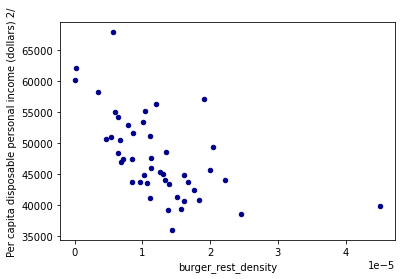

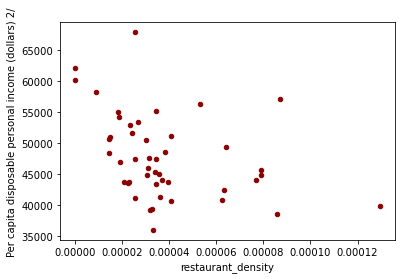

In [13]:
df_main.plot.scatter(x='burger_rest_density', y='Per capita disposable personal income (dollars) 2/', c='DarkBlue')
df_main.plot.scatter(x='restaurant_density', y='Per capita disposable personal income (dollars) 2/', c='DarkRed')


array([[<AxesSubplot:title={'center':'burger_rest_density'}>]],
      dtype=object)

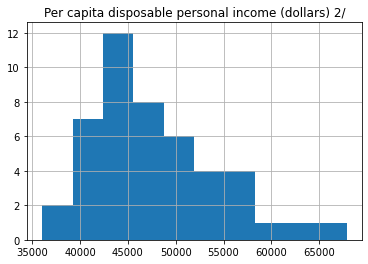

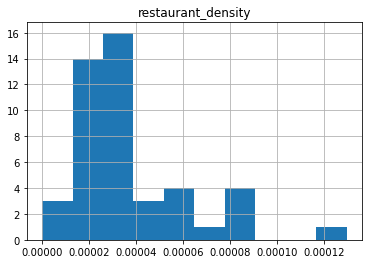

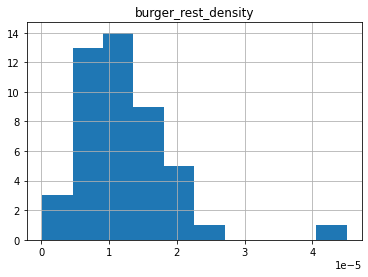

In [14]:
df_main.hist(column='Per capita disposable personal income (dollars) 2/')
df_main.hist(column = 'restaurant_density')
df_main.hist(column= 'burger_rest_density')

# PROJECT 2

## 1. Updated Project 1

### 1. Introduction
It is no question that fast food restaurants make up a generous portion of the United States' GDP. Due to it's low production cost and great taste, fast food is sold at a low cost, further increasing it's vast popularity. According to specific assumptions made in microeconomics, fast food is an inferior good; meaning as an individual's income increases the rate of purchases that are made on fast food will deccrease. Restaurant density is the proportion of restaurants to population. This shows the concentration of restaurants in a given area. Also, burgers are reported to be the most common purchased fast food. Thus, I want to investigate the correlation between restaurant density(independant variable) and income per capita(outcome) in a given state. I will also investigate burger restaurant density(independant variable) in order to observe it's relationship with income per capita has with restaurant_density.

The original fast food dataset was imported from Kaggle. Due to the absence of the variable income per capita, it is necesserry to import online datasets that contain population and per capita income. Additionally, using the Bureau of Economic Analysis database, I was able to import and eventually merge this dataframe to a new dataset consisting of all necessary variables to solve this question.

NOTE: I originally wanted to investigate the correlation between restaurant density and income per capita in a given city instead of a state in order to have more datapoints; however, I ran in to difficulties. I will first outline my original process and show what happened, in order to prove that it was most feasible to group corresponding data frames by state instead.

### 2. Import Packages

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pylab as plt
import matplotlib.colors as mplc
import matplotlib.patches as patches



### 3. Import and Read Datasets

In [16]:
restaurants = pd.read_csv('Datasets/Datafiniti_Fast_Food_Restaurants_May19.csv')
income_state = pd.read_csv("Datasets/income_state.csv")
state = pd.read_csv("Datasets/state_abbreviations.csv")

The 'restaurants' dataset shows over 10,000 restaurants in the United States, showing their names, location points (city, stat, longitude, latitude, postal code), id, date added to dataset, date updated, websites,and the food category.

In [17]:
print(restaurants.shape)
pd.set_option("max_colwidth",200)
restaurants.head()

(10000, 16)


,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.39629,-104.69699,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/carls-jr-7001402,https://www.carlsjr.com/?utm_source=Yextandutm_medium=Visit%20Websiteandutm_campaign=Homepage
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Restaurants,Restaurants",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.08135,-108.58689,Del Taco,81505,CO,"http://www.citysearch.com/profile/772076870/grand_junction_co/del_taco.html,https://www.yellowpages.com/grand-junction-co/mip/del-taco-475739804,https://www.tripadvisor.com/Restaurant_Review-g3345...",http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.09148,-108.55411,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/mip/which-wich-481453650,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chipotle-mexican-grill-537241840,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Restaurants",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.74044,-104.92636,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco-bell-459444587,https://locations.tacobell.com/co/denver/5225-e-colfax-ave.html?utm_source=yextandutm_campaign=yextpowerlistingsandutm_medium=referralandutm_term=004051andutm_content=website


This dataset shows the disposable income, population and disposable income per capita in each state in the year 2019

In [18]:
print(income_state.shape)
income_state.head()

(180, 5)


,GeoFips,GeoName,LineCode,Description,2019
0,0,United States *,51,Disposable personal income (millions of dollars),16199181.0
1,0,United States *,52,Population (persons) 1/,328329953.0
2,0,United States *,53,Per capita disposable personal income (dollars) 2/,49338.0
3,1000,Alabama,51,Disposable personal income (millions of dollars),196131.2
4,1000,Alabama,52,Population (persons) 1/,4907965.0


This dataset lists the states in the United Statesm their abbreviation and code.

In [19]:
print(state.shape)
state.head()

(51, 3)


,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


### 4. Data Cleaning

I want to mege 'income_state' with 'state' on the column name 'state' in order to eventually merge with the columns used in 'restaruants'. However, before i merge, I must remove the '*' next to some state names in 'income_state'. Once this is done, I can merge with 'state'.

In [20]:
income_state = pd.read_csv("Datasets/income_state.csv")
income_state["State"] = income_state.GeoName.str.replace(" \*", "")
state = pd.read_csv("Datasets/state_abbreviations.csv")
income_state = pd.merge(income_state, state, on='State')
income_state.head()

/var/folders/dl/pkdj8n7n6ps84w7d_v3vr0200000gn/T/ipykernel_35742/2456924109.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  income_state["State"] = income_state.GeoName.str.replace(" \*", "")


,GeoFips,GeoName,LineCode,Description,2019,State,Abbrev,Code
0,1000,Alabama,51,Disposable personal income (millions of dollars),196131.2,Alabama,Ala.,AL
1,1000,Alabama,52,Population (persons) 1/,4907965.0,Alabama,Ala.,AL
2,1000,Alabama,53,Per capita disposable personal income (dollars) 2/,39962.0,Alabama,Ala.,AL
3,2000,Alaska *,51,Disposable personal income (millions of dollars),41899.7,Alaska,Alaska,AK
4,2000,Alaska *,52,Population (persons) 1/,733603.0,Alaska,Alaska,AK


 When looking at the 'income_state'(Disposable income grouped by state) dataframe, it is evident that some of the data must be cleaned in our income dataframe. Firstly, it is evident that the values of the 'Description' variables should be columns and the newly added columns will take values corresponding to the '2019' column.

In [21]:
income_state = income_state.pivot(values='2019', index='Code', columns='Description').reset_index()
print(income_state.shape)
income_state.head()

(51, 4)


Description,Code,Disposable personal income (millions of dollars),Per capita disposable personal income (dollars) 2/,Population (persons) 1/
0,AK,41899.7,57115.0,733603.0
1,AL,196131.2,39962.0,4907965.0
2,AR,122878.1,40675.0,3020985.0
3,AZ,300174.7,41166.0,7291843.0
4,CA,2172607.7,55090.0,39437610.0


Now that I cleaned the dataframe grouped by state, I found the number of restaurants for each state. Then, I merged 'income_state' dataframe and the 'rest_count' dataframe which contains the number of restaurants in a given state. 

In [66]:
rest_count = restaurants.groupby(['province']).size().reset_index() 
rest_count.columns = ['Code', 'num_restaurants']
temp = pd.merge(income_state, rest_count, on='Code', how="outer")
temp.head()

,Code,Disposable personal income (millions of dollars),Per capita disposable personal income (dollars) 2/,Population (persons) 1/,num_restaurants
0,AK,41899.7,57115.0,733603.0,64.0
1,AL,196131.2,39962.0,4907965.0,635.0
2,AR,122878.1,40675.0,3020985.0,124.0
3,AZ,300174.7,41166.0,7291843.0,186.0
4,CA,2172607.7,55090.0,39437610.0,727.0


Finally, I want to add columns that finds the restaurant and burger restaurant density for each state. To do this, I first found every restaurant in the 'restaurants' dataset that served burgers and copied all it's corresponding values into a new dataset called 'burger_restaurants'. Once grouped by province, I am ready to merge this with my 'temp' dataset. All that is left now is to find the restaurant density and burger restaurant density and then add them as new columns. The dataset 'df_main' is finally complete

In [72]:
burger_restaurants = restaurants.loc[restaurants.categories.str.lower().str.contains("burger")]
burger_restaurants = burger_restaurants.groupby('province').size().reset_index()
burger_restaurants.columns = ['Code', 'num_burger_restaurants']
df_main = pd.merge(temp, burger_restaurants, on='Code')
df_main['restaurant_density'] = df_main['num_restaurants'] / df_main['Population (persons) 1/']
df_main['burger_rest_density'] = df_main['num_burger_restaurants'] / df_main['Population (persons) 1/']
df_main.head()

,Code,Disposable personal income (millions of dollars),Per capita disposable personal income (dollars) 2/,Population (persons) 1/,num_restaurants,num_burger_restaurants,restaurant_density,burger_rest_density
0,AK,41899.7,57115.0,733603.0,64.0,14,0.000087,0.000019
1,AL,196131.2,39962.0,4907965.0,635.0,221,0.000129,0.000045
2,AR,122878.1,40675.0,3020985.0,124.0,49,0.000041,0.000016
3,AZ,300174.7,41166.0,7291843.0,186.0,81,0.000026,0.000011
4,CA,2172607.7,55090.0,39437610.0,727.0,237,0.000018,0.000006


### 5. Summary Statistics

Lets view the summary statistics on 'num_restaurants' and 'restaurant_density' in order to later analyze which one is a better predictor

In [24]:
df_main[['Per capita disposable personal income (dollars) 2/', 'restaurant_density', 'burger_rest_density']].describe()

,Per capita disposable personal income (dollars) 2/,restaurant_density,burger_rest_density
count,46.000000,4.600000e+01,4.600000e+01
mean,47868.543478,3.774336e-05,1.223233e-05
std,6798.918328,2.522020e-05,7.367714e-06
min,36031.000000,2.249400e-07,1.124700e-07
25%,43585.750000,2.321761e-05,7.339480e-06
50%,46491.500000,3.230678e-05,1.121617e-05
75%,51511.750000,4.043670e-05,1.556070e-05
max,67854.000000,1.293815e-04,4.502885e-05


### 6. Visualization

Text(0, 0.5, 'Disposable Income Per Capita')

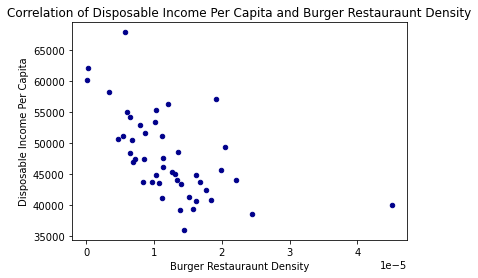

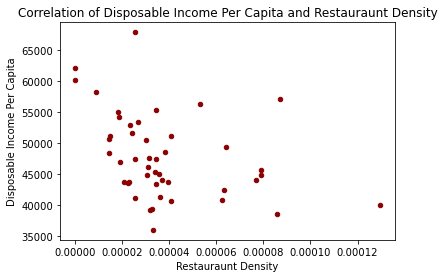

In [25]:
df_main.plot.scatter(x='burger_rest_density', y='Per capita disposable personal income (dollars) 2/', c='DarkBlue')
plt.title('Correlation of Disposable Income Per Capita and Burger Restauraunt Density')
plt.xlabel('Burger Restauraunt Density')
plt.ylabel('Disposable Income Per Capita')

df_main.plot.scatter(x='restaurant_density', y='Per capita disposable personal income (dollars) 2/', c='DarkRed')
plt.title('Correlation of Disposable Income Per Capita and Restauraunt Density')
plt.xlabel('Restauraunt Density')
plt.ylabel('Disposable Income Per Capita')

Text(0, 0.5, 'Count')

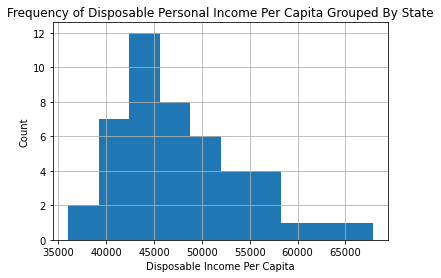

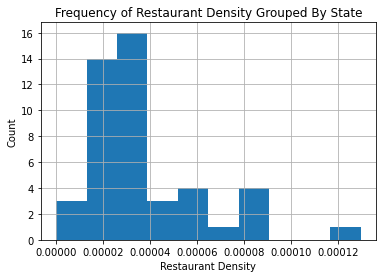

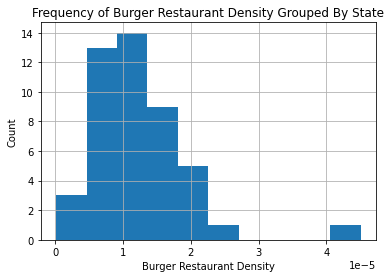

In [26]:
df_main.hist(column='Per capita disposable personal income (dollars) 2/')
plt.title('Frequency of Disposable Personal Income Per Capita Grouped By State')
plt.xlabel('Disposable Income Per Capita')
plt.ylabel('Count')

df_main.hist(column = 'restaurant_density')
plt.title('Frequency of Restaurant Density Grouped By State')
plt.xlabel('Restaurant Density')
plt.ylabel('Count')

df_main.hist(column= 'burger_rest_density')
plt.title('Frequency of Burger Restaurant Density Grouped By State')
plt.xlabel('Burger Restaurant Density')
plt.ylabel('Count')

### 7. Conclusion

After doing some data cleaning, I was able to extracract relevant data to answer my question. In fact, after plotting the scatter plot between restaurant density and personal disposable income per capita, there is evidence of a somewhat strong negative correlation between the two variables. This means that as disposable income per capita increases, the concentration of restaurants in a given area decreases. Because of this relatively strong relationship, it will be interesting to further explore and analyze the data and make some economic intuition out of future conclusions made. For example, because fast foods are known to be inferior goods, this may explain why the concentration of fast food restaurants are lower in high income areas.  Similarly, we can also explore burger restaurant density as it seems to have an even stronger correlation with disposable income per capita.

## 2. The Message: 
### Does Disposable Income per Capita Determine the Desnity of Fast Food Restaurants in a State?

At the beginning of the paper, I wanted to see if there was a correlation between restaurant density and disposable income per capita. After analyzing the data, it was evident that the data contained categories that included a wide genre of food. Therefore I chose to specifically explore the correlation between the density of restaurants that sell burgers and personal income per capita. After observing the negative correlation between income and bureger restaurant density, this follows economic intuition. Burgers are inferior goods, meaning as income rises less of that good will be purchased. Therefore, in states where income is high, less people will buy fast food, meaning the fast food service sector will contribute less to GDP, meaning less fast food restaurants will open in that area because demand is relativelt lower. 


## 3. Control Group

It is evident that we see a relatively negative correlation between burger restaurant density and disposable income per capita. This means that as disposable income per capita increases in a given state, there will be a smaller density of burger restaurants within that state. In order to further test the accuracy of this relationship, I will introduce a control group represented as 'cafe_density' and present the relationship to disposable income per capita. If my hypothesis holds, because products served at cafe's are not inferior goods, the correlation should be relatively weaker. 
In the code below, I searched under the 'categories' variable in the 'restaurants' dataset and searched for all values corresponding to a category containing the word coffee. I then grouped values by province and stored data in 'cafe'. Once I merged this new table with our old main dataframe, ('df_main') I calculated the coffee density

In [95]:
cafe = restaurants.loc[restaurants.categories.str.lower().str.contains(r'coffee|cafe')]
cafe = cafe.groupby('province').size().reset_index()
cafe.columns = ['Code', 'num_coffee_houses']
df_new = pd.merge(df_main, cafe, on = 'Code')
df_new['cafe_density'] = df_new['num_coffee_houses'] / df_new['Population (persons) 1/']
df_new.head()



,Code,Disposable personal income (millions of dollars),Per capita disposable personal income (dollars) 2/,Population (persons) 1/,num_restaurants,num_burger_restaurants,restaurant_density,burger_rest_density,num_coffee_houses,cafe_density
0,AK,41899.7,57115.0,733603.0,64.0,14,0.000087,0.000019,5,0.000007
1,AL,196131.2,39962.0,4907965.0,635.0,221,0.000129,0.000045,38,0.000008
2,AR,122878.1,40675.0,3020985.0,124.0,49,0.000041,0.000016,5,0.000002
3,AZ,300174.7,41166.0,7291843.0,186.0,81,0.000026,0.000011,13,0.000002
4,CA,2172607.7,55090.0,39437610.0,727.0,237,0.000018,0.000006,78,0.000002


## 4. Visualization

Because we want to observe the strength correlation between two variables, a scatter plot is most sensible. Before I plot correlation between variables 'burger_desnity' and 'cafe_desnity' and then compare the correlation with income per capita, I will import a package that will make plots look more visually pleasing .

In [96]:
import seaborn as sns


Text(0, 0.5, 'Disposable Income Per Capita')

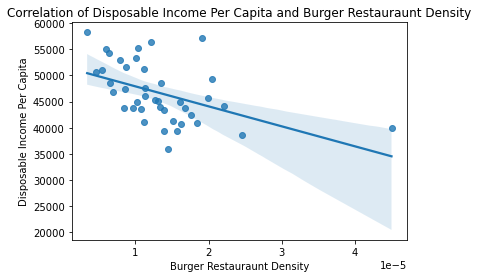

In [97]:
sns.regplot(data=df_new, x='burger_rest_density', y='Per capita disposable personal income (dollars) 2/')
plt.title('Correlation of Disposable Income Per Capita and Burger Restauraunt Density')
plt.xlabel('Burger Restauraunt Density')
plt.ylabel('Disposable Income Per Capita')


It is evident there is a relatively strong negative relationship between burger resturaunt density and personal income per capita as we observed previously.

Text(0, 0.5, 'Disposable Income Per Capita')

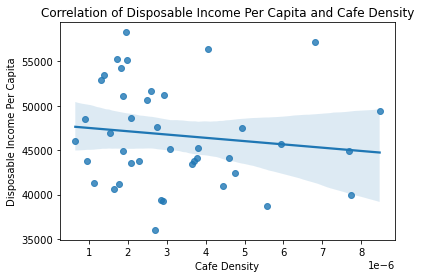

In [98]:
sns.regplot(data=df_new, x='cafe_density', y='Per capita disposable personal income (dollars) 2/')
plt.title('Correlation of Disposable Income Per Capita and Cafe Density')
plt.xlabel('Cafe Density')
plt.ylabel('Disposable Income Per Capita')

When analyzing the relationship between cafe density and disposable income per capita, the relationship is very weak. Intuitively, this makes sense. Because coffee is not an inferior good nor a luxury good, it has a very week relationship with disposable income per capita. The estimation of the strength of this relationship is represented by the line. It is evident that the line is almost horizontal, meaning the slope of this linear approzimation is close to zero, ultimately, representing the very weak relationship between both variables 

## 5. Mapping

In [107]:
import geopandas as gpd
from shapely.geometry import Point
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

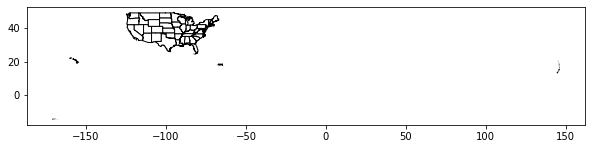

In [125]:
states = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")

fig, gax = plt.subplots(figsize=(10, 10))
states.query("NAME != 'Alaska'").plot(ax=gax, edgecolor="black", color="white")
plt.show()

<AxesSubplot:>

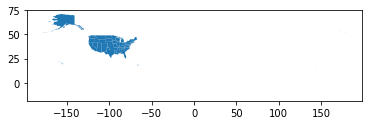

In [122]:
states.plot()

<AxesSubplot:>

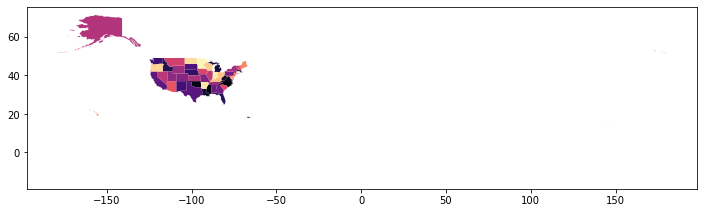

In [111]:
states.plot(cmap='magma', figsize=(12, 12))

<AxesSubplot:>

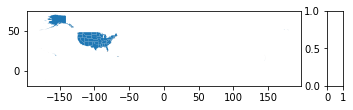

In [115]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
states.plot(ax=ax, cax=cax)
#adm_gdf.plot(column='pop_est', ax=ax, legend=True, cax=cax)

<AxesSubplot:>

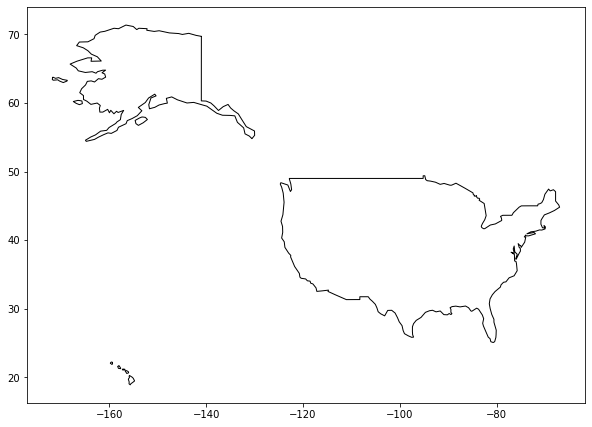

In [119]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

In [129]:
restaurants.province.nunique()

47